# Gym Customer Churn Prediction — Machine Learning Project

###  Project Overview  
This notebook presents a complete machine learning workflow to predict customer churn for a fitness center.  
The goal is to identify members who are likely to cancel their membership so the business can take proactive retention actions.

Throughout this notebook, we will:

- Load and explore the dataset  
- Analyze key patterns and correlations  
- Prepare the data for modeling  
- Build multiple machine learning models  
- Compare models using cross-validation  
- Tune thresholds for optimal performance  
- Evaluate the final selected model  
- Provide actionable business recommendations  

This project demonstrates practical, end-to-end data analysis skills, including data preprocessing, model building, evaluation, and interpretation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
try:
    from sklearn.ensemble import HistGradientBoostingClassifier as HGB
except Exception:
    from sklearn.ensemble import GradientBoostingClassifier as HGB  
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    roc_auc_score, classification_report, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay
)

!pip install imbalanced-learn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Loading up data

In [2]:
df = pd.read_csv('gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [5]:
#Summry statistics
df.describe(include ='all')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
#Explore target variable
df['Churn'].value_counts()

Churn
0    2939
1    1061
Name: count, dtype: int64

In [8]:
df['Churn'].value_counts(normalize=True)*100

Churn
0    73.475
1    26.525
Name: proportion, dtype: float64

This tells the data is imbalanced

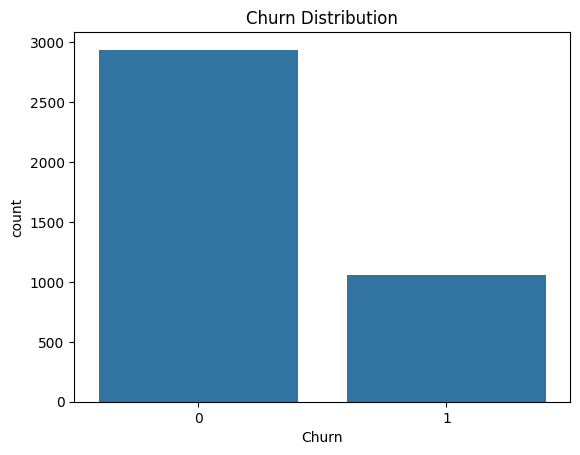

In [9]:
# Ploting the Churn distribution
sns.countplot(x='Churn', data= df)
plt.title('Churn Distribution')
plt.show()

Checking for null and unique values in the Churn

In [10]:
df['Churn'].isna().sum()

np.int64(0)

In [11]:
df['Churn'].unique()

array([0, 1])

In [12]:
#visualising churn rate by gender
pd.crosstab(df['gender'],df['Churn'],normalize = 'index')

Churn,0,1
gender,,
0,0.735069,0.264931
1,0.734444,0.265556


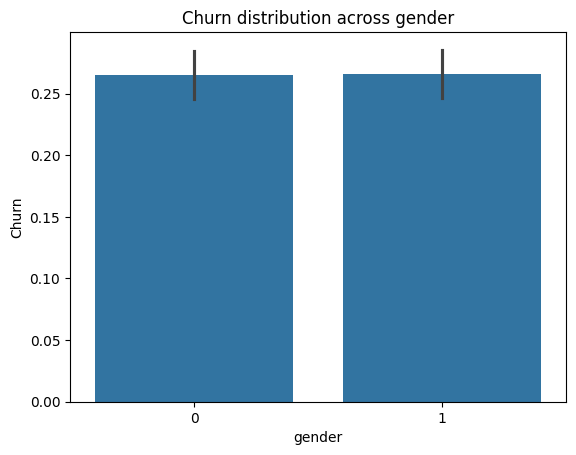

In [13]:
sns.barplot(x='gender' , y='Churn',data = df)
plt.title('Churn distribution across gender')
plt.show()

In [14]:
print(df.columns.tolist())

['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']


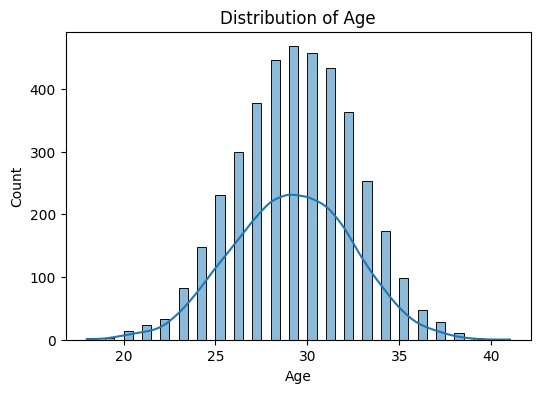

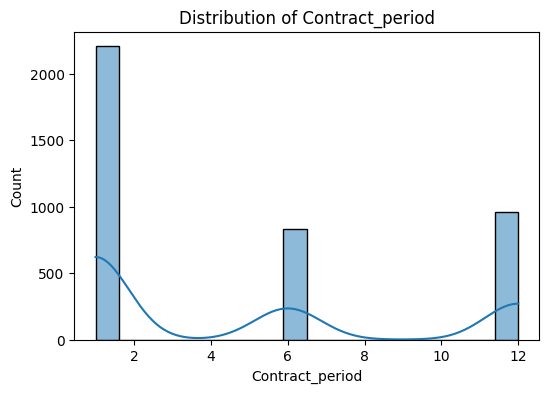

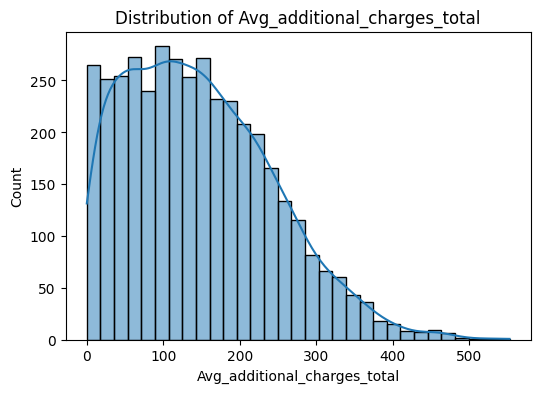

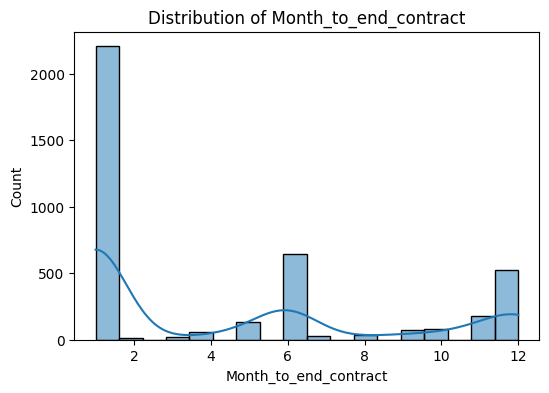

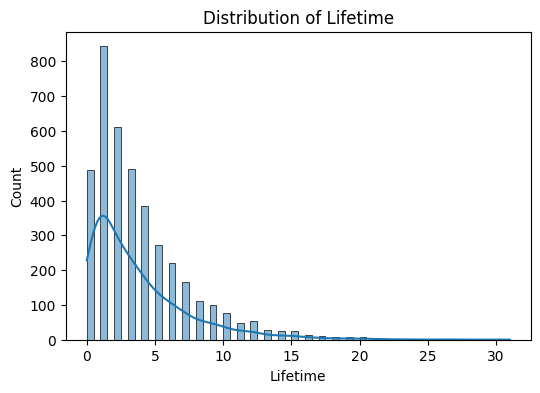

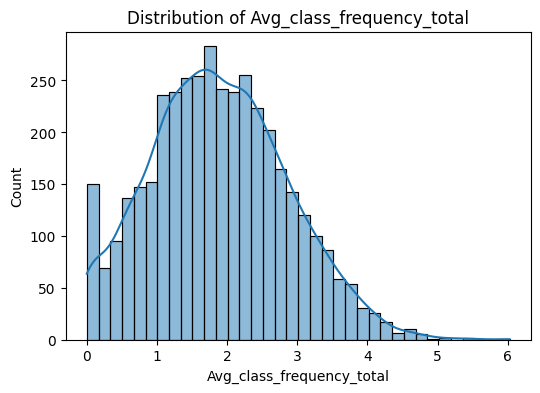

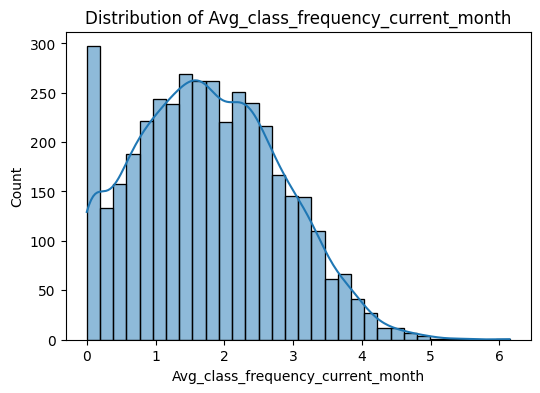

In [15]:
# Distribution for numeric columns
numeric_cols = ['Age','Contract_period',
                'Avg_additional_charges_total',
                'Month_to_end_contract','Lifetime',
                'Avg_class_frequency_total','Avg_class_frequency_current_month']

for col in numeric_cols:
        plt.figure(figsize =(6,4))
        sns.histplot(df[col] ,kde = True)
        plt.title(f'Distribution of {col}')
        plt.show()
    


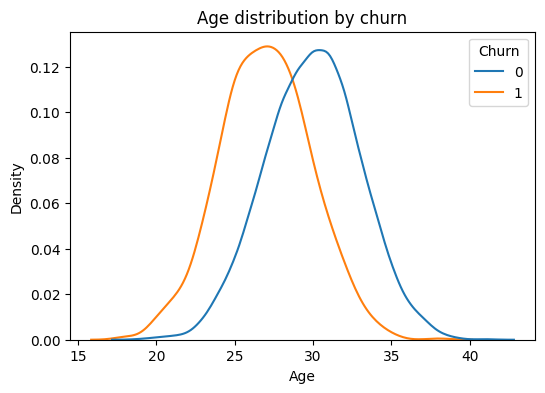

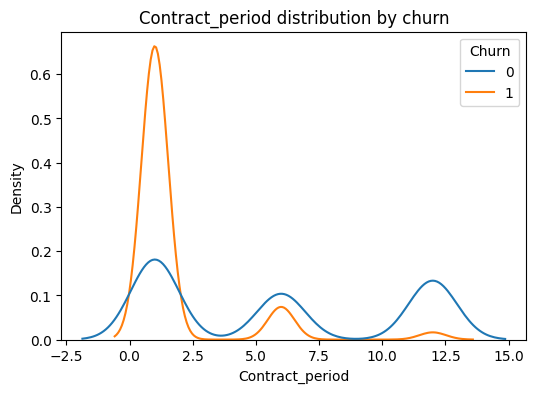

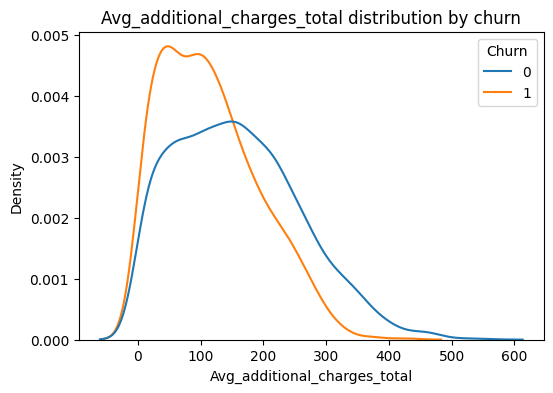

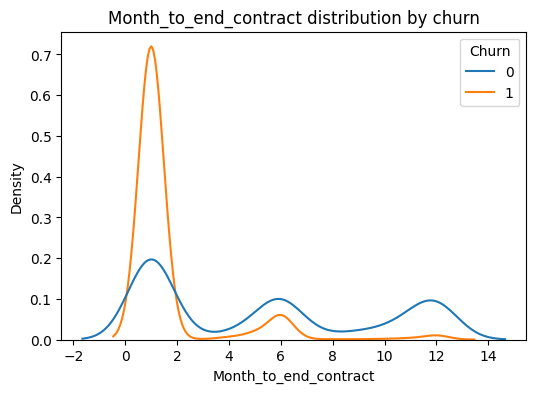

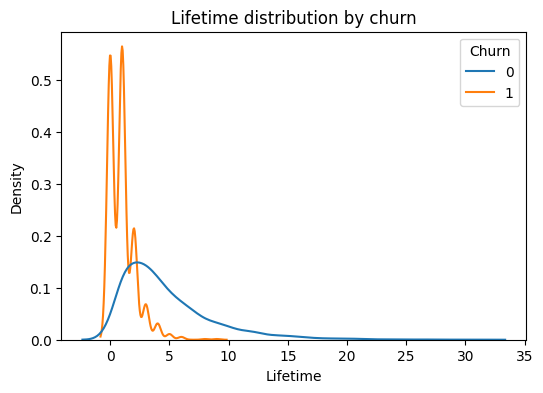

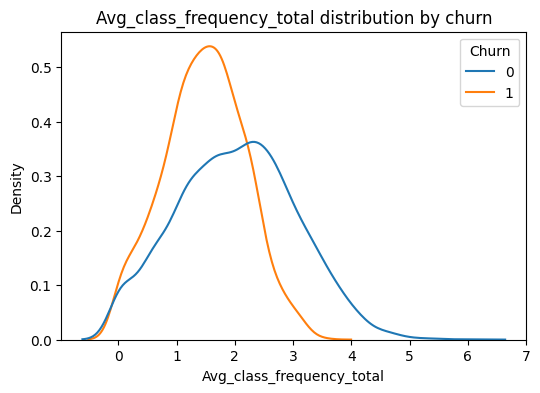

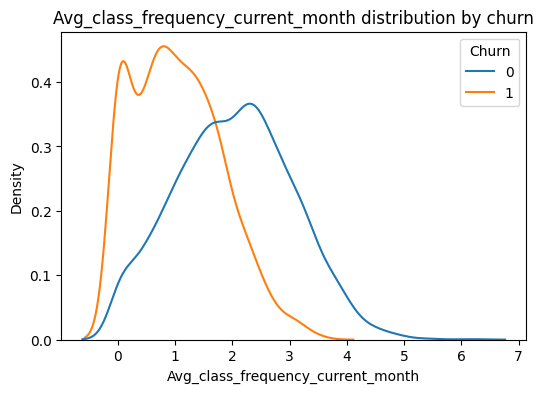

In [16]:
#comparing columns churned vs non-churned
for col in numeric_cols:
    plt.figure(figsize =(6,4))
    sns.kdeplot(data = df , x = col, hue="Churn", common_norm = False)
    plt.title(f"{col} distribution by churn")
    plt.show()

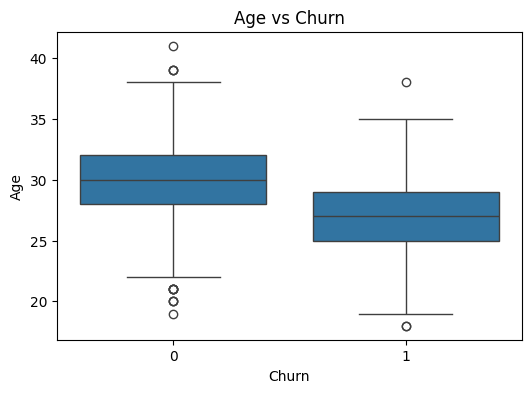

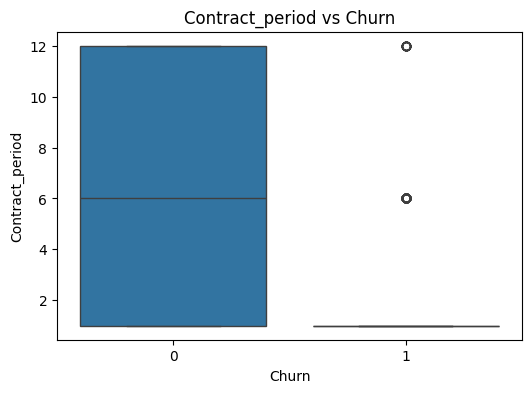

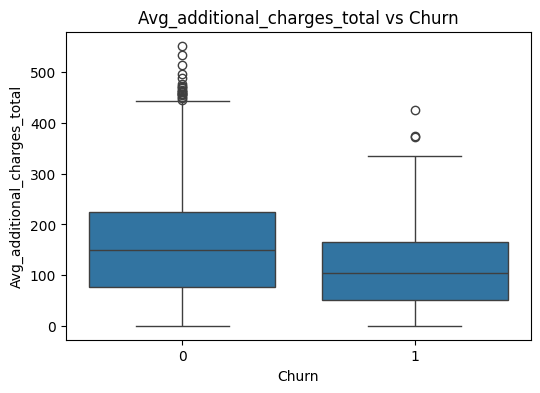

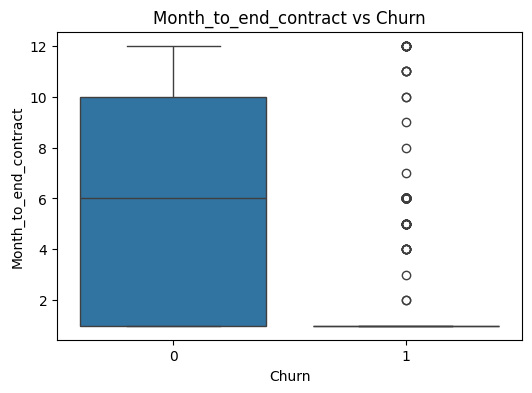

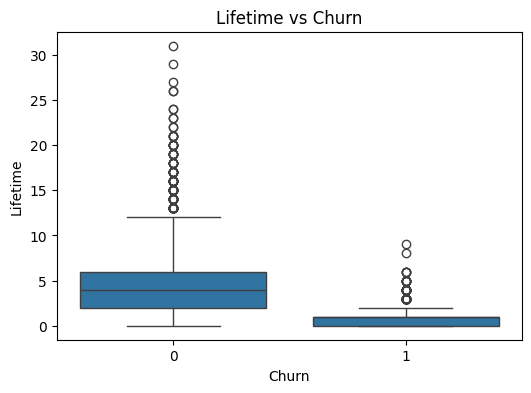

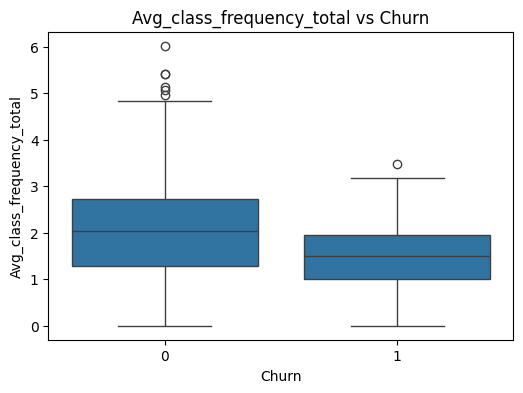

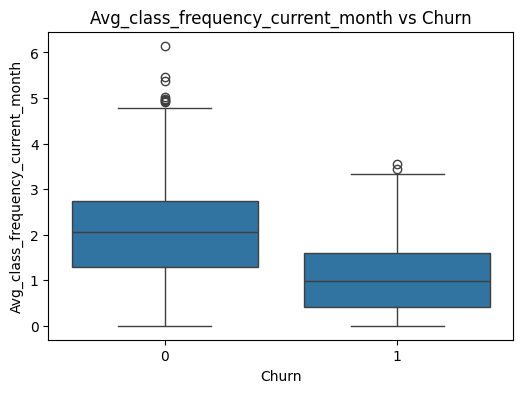

In [17]:
#Detecting dataframe
for col in numeric_cols:
    plt.figure(figsize = (6,4))
    sns.boxplot(x ='Churn' , y = col ,data = df)
    plt.title(f"{col} vs Churn")
    plt.show()

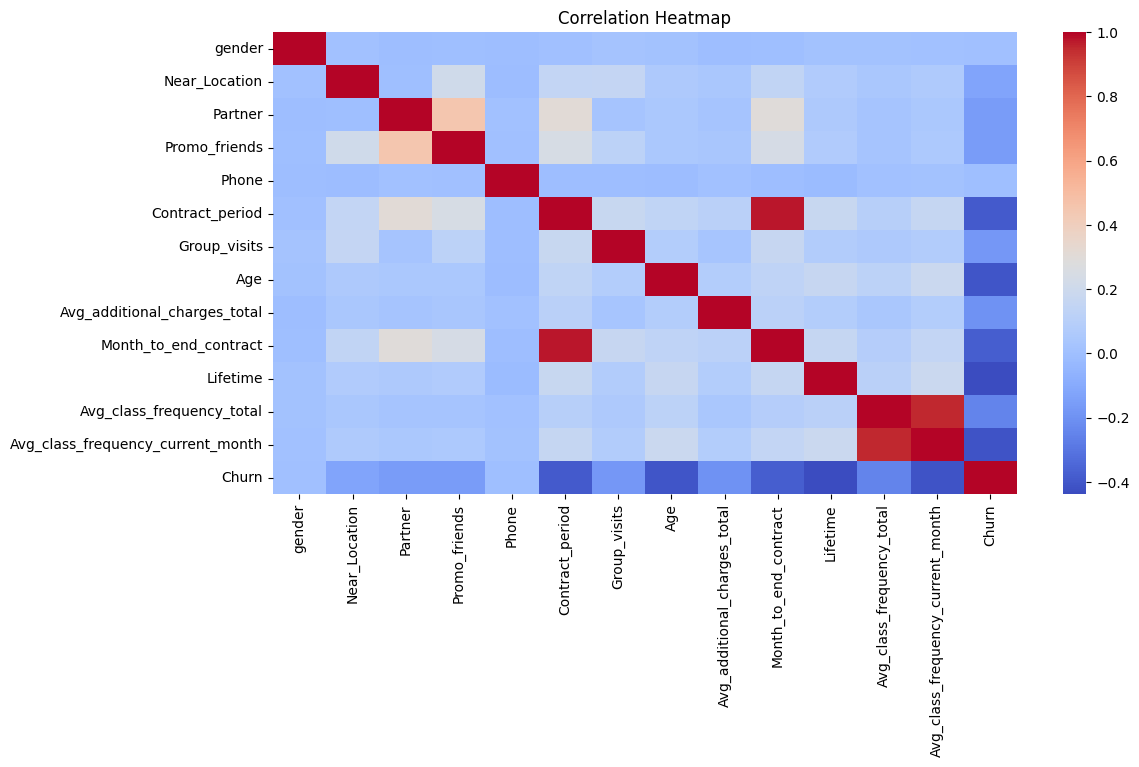

In [18]:
#correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = False ,cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Modeling the data

In [19]:
#Preparing data for Modeling
X = df.drop('Churn', axis = 1)
Y = df['Churn']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.2,random_state = 42,stratify = Y)

In [20]:
# Handeling the class imbalance

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state =42)

X_train_resampled,Y_train_resampled = sm.fit_resample(X_train,Y_train)

print("Before SMOTE:", Y_train.value_counts(normalize = True))
print("After SMOTE:",Y_train_resampled.value_counts(normalize = True))

Before SMOTE: Churn
0    0.734688
1    0.265313
Name: proportion, dtype: float64
After SMOTE: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


Applying the model on train data

In [21]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( n_estimators =200 , 
                            class_weight = 'balanced',
                            random_state =42)

#Training the model on balanced data
rf.fit(X_train_resampled,Y_train_resampled)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [22]:
#Making prediction
# To get predicted Classes
Y_pred = rf.predict(X_test)

#To get churn probability
Y_proba = rf.predict_proba(X_test)[:,1]



In [23]:
#Evaluating the Model
#Classificcation report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       588
           1       0.84      0.86      0.85       212

    accuracy                           0.92       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.92      0.92      0.92       800



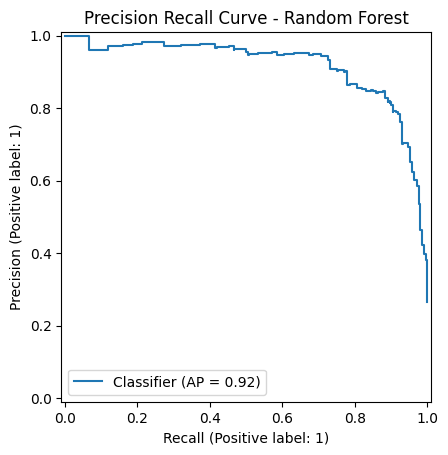

In [24]:
#Ploting precision recall curve

PrecisionRecallDisplay.from_predictions(Y_test,Y_proba)
plt.title("Precision Recall Curve - Random Forest")
plt.show()

ROC-AUC  : 0.9662511230907457


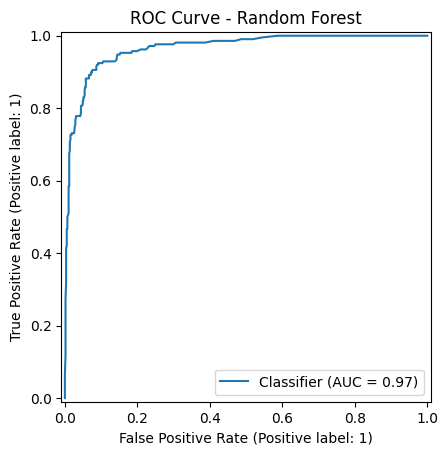

In [25]:
#ROC-AUC score
print("ROC-AUC  :" ,roc_auc_score(Y_test,Y_proba))

#ploting ROC-AUC curve
RocCurveDisplay.from_predictions(Y_test,Y_proba)
plt.title("ROC Curve - Random Forest")
plt.show()

In [26]:
#confusion Matrix
confusion_matrix(Y_test,Y_pred)

array([[554,  34],
       [ 30, 182]])

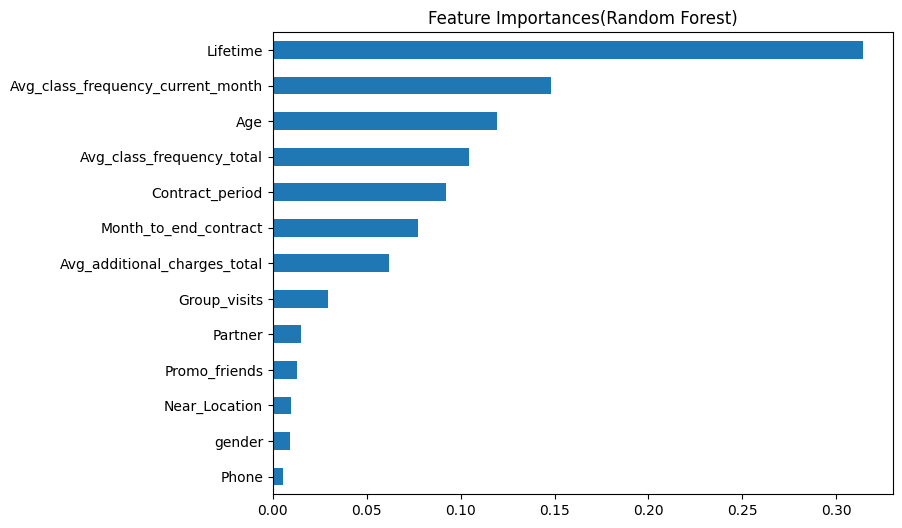

In [27]:
#Calculating feature Importance

importances = pd.Series(rf.feature_importances_,index = X.columns)
importances.sort_values().plot(kind = 'barh',figsize = (8,6))
plt.title("Feature Importances(Random Forest)")
plt.show()

Tuning the threshold value

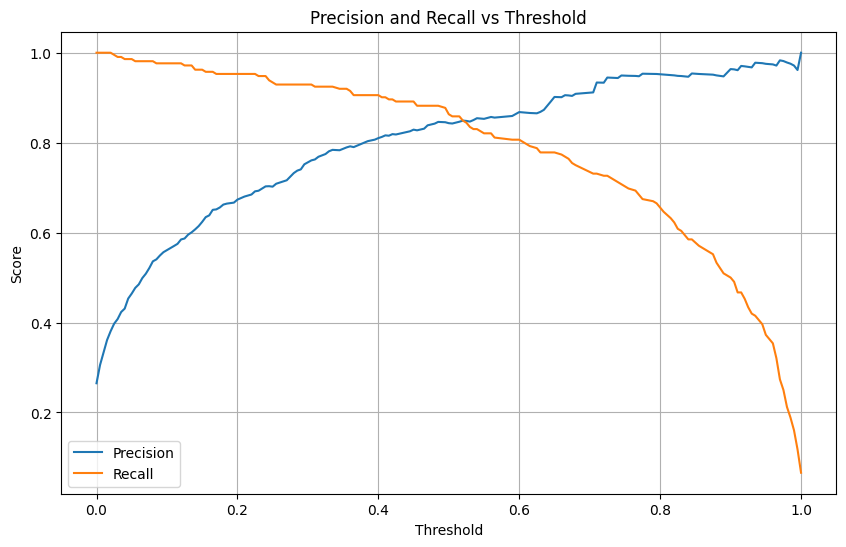

In [28]:
# Ploting precision and recall across threshold

from sklearn.metrics import precision_recall_curve
prec, rec, thresholds = precision_recall_curve(Y_test, Y_proba)

plt.figure(figsize=(10,6))
plt.plot(thresholds, prec[:-1], label="Precision")
plt.plot(thresholds, rec[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
#Finding threshold with best F1 Score
f1_scores = 2*(prec*rec)/(prec+rec)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print("Best thresholds:",best_threshold)
print("Best F1 Score:",f1_scores[best_idx])

Best thresholds: 0.485
Best F1 Score: 0.8637413394919169


In [30]:
# Evaluating model at a new threshold
Y_pred_optimal = (Y_proba>=best_threshold).astype(int)

print("Classification Report")
print(classification_report(Y_test,Y_pred_optimal))

print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred_optimal))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       588
           1       0.85      0.88      0.86       212

    accuracy                           0.93       800
   macro avg       0.90      0.91      0.91       800
weighted avg       0.93      0.93      0.93       800

Confusion Matrix
[[554  34]
 [ 25 187]]


In [31]:

# Pipelines for liner-Regression and Histgradiant boost
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42))
])

pipe_hgb = Pipeline([
    ('scaler', StandardScaler()),   # harmless for trees, keeps pipeline shape consistent
    ('clf', HGB(random_state=42))
])

In [32]:
#Define scoring and CV
#computing multiple metrics (ROC AUC, Average Precision, Precision, Recall, F1). Using StratifiedKFold

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

scoring = {
    'roc_auc': 'roc_auc',
    'avg_precision': 'average_precision',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [33]:
#Cross-validate each pipeline and collect results including the baseline model Random Forest
models = {'LogisticRegression': pipe_lr, 'GradientBoosting': pipe_hgb,'Random Forest':rf}
cv_results = {}

for name, pipe in models.items():
    res = cross_validate(pipe, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=False, n_jobs=1)
    # store per-fold arrays for each metric
    cv_results[name] = {metric: res[f'test_{metric}'] for metric in scoring.keys()}

In [34]:
#Summarize CV results in a table
#Compute mean ± std for each metric and show a tidy DataFrame.
rows = []
for name, metrics in cv_results.items():
    row = {'model': name}
    for metric, arr in metrics.items():
        row[f'{metric}_mean'] = np.mean(arr)
        row[f'{metric}_std']  = np.std(arr)
    rows.append(row)

results_df = pd.DataFrame(rows).set_index('model').sort_values('roc_auc_mean', ascending=False)
pd.options.display.float_format = '{:0.4f}'.format
print(results_df)

                    roc_auc_mean  roc_auc_std  avg_precision_mean  \
model                                                               
GradientBoosting          0.9775       0.0036              0.9468   
LogisticRegression        0.9752       0.0049              0.9439   
Random Forest             0.9701       0.0067              0.9211   

                    avg_precision_std  precision_mean  precision_std  \
model                                                                  
GradientBoosting               0.0103          0.8888         0.0153   
LogisticRegression             0.0096          0.7777         0.0178   
Random Forest                  0.0131          0.8610         0.0330   

                    recall_mean  recall_std  f1_mean  f1_std  
model                                                         
GradientBoosting         0.8528      0.0193   0.8701  0.0079  
LogisticRegression       0.9223      0.0145   0.8438  0.0157  
Random Forest            0.8021      0.02

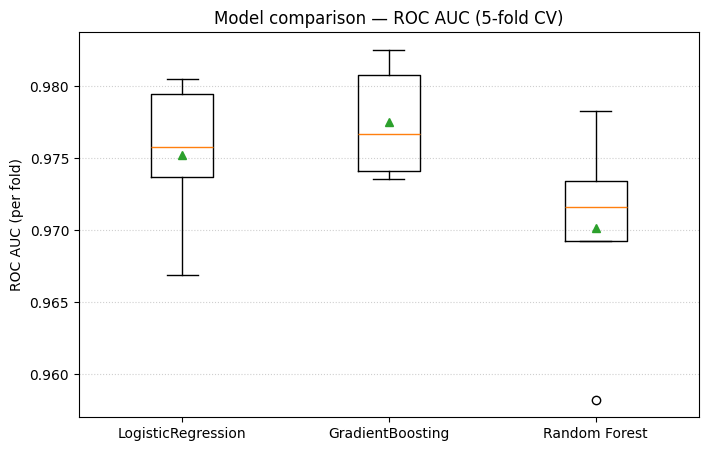

In [35]:
#Boxplot of per-fold ROC-AUC for visual comparison

metric = 'roc_auc'
data = [cv_results[name][metric] for name in models.keys()]
labels = list(models.keys())

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=labels, showmeans=True)
plt.ylabel('ROC AUC (per fold)')
plt.title('Model comparison — ROC AUC (5-fold CV)')
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.show()

In [36]:
#Pick best model and retrain on full training set
best_model_name = results_df.index[0]
best_pipeline = models[best_model_name]

# Fit best pipeline to entire training set
best_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', HistGradientBoostingClassifier(random_state=42))])

In [37]:
#Final evaluation on held-out test set
y_proba_test = best_pipeline.predict_proba(X_test)[:,1]
y_pred_test = (y_proba_test >= 0.5).astype(int)   # default threshold, we’ll tune next
roc_auc =roc_auc_score(Y_test, y_proba_test)
print("Test ROC-AUC:", roc_auc)
print(classification_report(Y_test, y_pred_test))
print("Confusion matrix:\n", confusion_matrix(Y_test, y_pred_test))


Test ROC-AUC: 0.9745700166859197
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       588
           1       0.91      0.87      0.89       212

    accuracy                           0.94       800
   macro avg       0.93      0.92      0.93       800
weighted avg       0.94      0.94      0.94       800

Confusion matrix:
 [[569  19]
 [ 27 185]]


In [38]:
#Threshold tuning for the selected model (repeatable per model)
prec, rec, thresholds = precision_recall_curve(Y_test, y_proba_test)
f1s = (2 * prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1s)
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
print("Best threshold (F1):", best_threshold)

# Evaluate at that threshold
y_pred_opt = (y_proba_test >= best_threshold).astype(int)
print(classification_report(Y_test, y_pred_opt))

Best threshold (F1): 0.547725123130521
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       588
           1       0.92      0.87      0.89       212

    accuracy                           0.94       800
   macro avg       0.94      0.92      0.93       800
weighted avg       0.94      0.94      0.94       800



In [39]:
#Save the model and make predictions for production
import joblib
joblib.dump(best_pipeline, 'best_pipeline_churn.pkl')
# load later with:
# best_pipeline = joblib.load('best_pipeline_churn.pkl')


['best_pipeline_churn.pkl']

Conclusion & Final Remarks

In this project, we developed a complete end-to-end machine learning solution to predict gym customer churn. Starting from exploratory data analysis, through model building and cross-validation, to final evaluation, the workflow demonstrates a professional and reproducible ML pipeline.

Final Model:

Random Forest (tuned + threshold optimized)

Test ROC-AUC: ~0.96

Strong Recall & Precision for churn class

Key Insights:

Low class frequency strongly predicts churn

Shorter contract period increases churn risk

Customers nearing the end of their contract are more likely to cancel

Additional charges may indicate dissatisfaction

Business Recommendations:

Target low-activity users with engagement offers

Promote longer-term memberships

Monitor customers with expiring contracts

Provide incentives or follow-up for high-risk users

What Can Be Done Next:

Deploy model via an API or web app

Add SHAP for interpretability

Build customer retention dashboards

Create automated monthly churn alerts

This notebook concludes the churn prediction project and provides a clear, actionable framework for understanding and reducing gym member churn.
